<a href="https://colab.research.google.com/github/TosinSDGs/TosinSDGs/blob/main/Banking_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Tosin Gbadegesin
    
The project involves analysing the performance of various machine learning classifiers on a dataset related to direct marketing campaigns conducted by a Portuguese banking institution. The marketing campaigns were carried out via phone calls, and the goal was to predict whether clients would subscribe to a bank term deposit or not. The dataset likely includes various features related to the clients, their attributes, and the outcome of the marketing campaign.

The objective of the project is to develop and evaluate a predictive model that can accurately predict whether a client will subscribe to a bank term deposit based on the features provided in the dataset. The project aims to explore the effectiveness of different classifiers, such as Gaussian Naive Bayes, Decision Trees, Random Forest, Gradient Boosting, XGBoost, and AdaBoost, both individually and as an ensemble. The evaluation metrics used, including balanced accuracy, PR AUC, F1 score, and log-loss function, will provide insights into the model's performance in terms of precision, recall, and overall predictive accuracy.

Additionally, by utilizing both random split and stratified split methods for data splitting, the project demonstrates a comprehensive evaluation approach by considering the impact of dataset partitioning on model performance. The ensemble classifier further seeks to combine the strengths of individual classifiers to potentially improve overall predictive power.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
banking_df = pd.read_csv("Banking data.csv", sep=';', quotechar='"')

In [ ]:
print(banking_df.head(10))

   age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may     

In [ ]:
# Define the mapping dictionary
mapping = {'yes': 1, 'no': 0}

# Map the values in the 'y' column using the mapping dictionary
banking_df['y'] = banking_df['y'].map(mapping)
banking_df['housing'] = banking_df['housing'].map(mapping)
banking_df['loan'] = banking_df['loan'].map(mapping)
banking_df['default'] = banking_df['default'].map(mapping)

In [ ]:
print(banking_df.tail(5))

       age           job   marital  education  default  balance  housing  \
45206   51    technician   married   tertiary        0      825        0   
45207   71       retired  divorced    primary        0     1729        0   
45208   72       retired   married  secondary        0     5715        0   
45209   57   blue-collar   married  secondary        0      668        0   
45210   37  entrepreneur   married  secondary        0     2971        0   

       loan    contact  day month  duration  campaign  pdays  previous  \
45206     0   cellular   17   nov       977         3     -1         0   
45207     0   cellular   17   nov       456         2     -1         0   
45208     0   cellular   17   nov      1127         5    184         3   
45209     0  telephone   17   nov       508         4     -1         0   
45210     0   cellular   17   nov       361         2    188        11   

      poutcome  y  
45206  unknown  1  
45207  unknown  1  
45208  success  1  
45209  unknown  0 

In [ ]:
# List of columns to be dropped
columns_to_drop = ['marital', 'day', 'month', 'duration']

# Drop the specified columns
banking_df = banking_df.drop(columns=columns_to_drop, axis=1)

In [ ]:
print(banking_df.tail(5))

       age           job  education  default  balance  housing  loan  \
45206   51    technician   tertiary        0      825        0     0   
45207   71       retired    primary        0     1729        0     0   
45208   72       retired  secondary        0     5715        0     0   
45209   57   blue-collar  secondary        0      668        0     0   
45210   37  entrepreneur  secondary        0     2971        0     0   

         contact  campaign  pdays  previous poutcome  y  
45206   cellular         3     -1         0  unknown  1  
45207   cellular         2     -1         0  unknown  1  
45208   cellular         5    184         3  success  1  
45209  telephone         4     -1         0  unknown  0  
45210   cellular         2    188        11    other  0  


In [ ]:
# List the column names
column_names = banking_df.columns.tolist()

# Print the list of column names
print(column_names)

['age', 'job', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [ ]:
# Check the number of missing (NaN) values in each column
missing_counts = banking_df.isna().sum()

# Print the number of missing values in each column
print("\nNumber of Missing Values in Each Column:")
print(missing_counts)


Number of Missing Values in Each Column:
age          0
job          0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


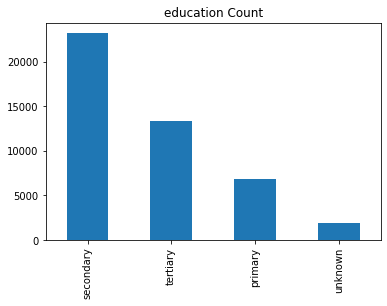

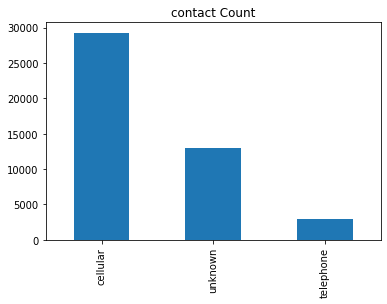

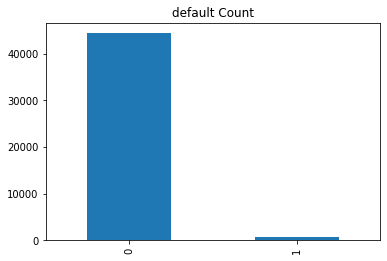

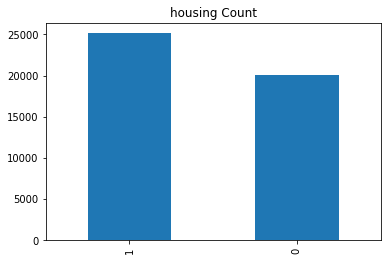

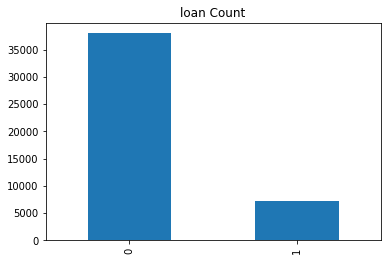

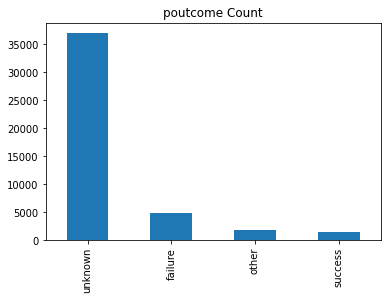

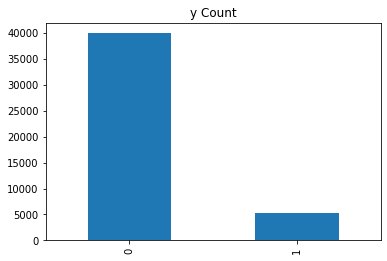

In [ ]:
# Visualize the count of categorical features (bar plots)
categorical_columns = ['education', 'contact', 'default', 'housing', 'loan', 'poutcome', 'y']
for column in categorical_columns:
    banking_df[column].value_counts().plot(kind='bar')
    plt.title(f'{column} Count')
    plt.show()

In [ ]:
# List of columns for one-hot encoding
columns_to_encode = ['education', 'poutcome', 'job', 'contact']

# Perform one-hot encoding
banking_en = pd.get_dummies(banking_df, columns=columns_to_encode)

In [ ]:
print(banking_en.head(5))

   age  default  balance  housing  loan  campaign  pdays  previous  y  \
0   58        0     2143        1     0         1     -1         0  0   
1   44        0       29        1     0         1     -1         0  0   
2   33        0        2        1     1         1     -1         0  0   
3   47        0     1506        1     0         1     -1         0  0   
4   33        0        1        0     0         1     -1         0  0   

   education_primary  ...  job_retired  job_self-employed  job_services  \
0                  0  ...            0                  0             0   
1                  0  ...            0                  0             0   
2                  0  ...            0                  0             0   
3                  0  ...            0                  0             0   
4                  0  ...            0                  0             0   

   job_student  job_technician  job_unemployed  job_unknown  contact_cellular  \
0            0               

In [ ]:
# List the column names
column_names = banking_en.columns.tolist()

# Print the list of column names
print(column_names)

['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'y', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'contact_cellular', 'contact_telephone', 'contact_unknown']


In [ ]:
# Check the number of missing (NaN) values in each column
missing_counts = banking_en.isna().sum()

# Print the number of missing values in each column
print("\nNumber of Missing Values in Each Column:")
print(missing_counts.head(10))


Number of Missing Values in Each Column:
age                  0
default              0
balance              0
housing              0
loan                 0
campaign             0
pdays                0
previous             0
y                    0
education_primary    0
dtype: int64


In [ ]:
# Display basic information about the DataFrame
print("Basic Info:")
print(banking_en.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   campaign             45211 non-null  int64
 6   pdays                45211 non-null  int64
 7   previous             45211 non-null  int64
 8   y                    45211 non-null  int64
 9   education_primary    45211 non-null  uint8
 10  education_secondary  45211 non-null  uint8
 11  education_tertiary   45211 non-null  uint8
 12  education_unknown    45211 non-null  uint8
 13  poutcome_failure     45211 non-null  uint8
 14  poutcome_other       45211 non-null  uint8
 15  poutcome_success     45211 non-null  uint8
 16  poutcome_u

In [ ]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(banking_en.describe())


Summary Statistics:
                age       default        balance       housing          loan  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210      0.018027    1362.272058      0.555838      0.160226   
std       10.618762      0.133049    3044.765829      0.496878      0.366820   
min       18.000000      0.000000   -8019.000000      0.000000      0.000000   
25%       33.000000      0.000000      72.000000      0.000000      0.000000   
50%       39.000000      0.000000     448.000000      1.000000      0.000000   
75%       48.000000      0.000000    1428.000000      1.000000      0.000000   
max       95.000000      1.000000  102127.000000      1.000000      1.000000   

           campaign         pdays      previous             y  \
count  45211.000000  45211.000000  45211.000000  45211.000000   
mean       2.763841     40.197828      0.580323      0.116985   
std        3.098021    100.128746      2.303441      0.321406  

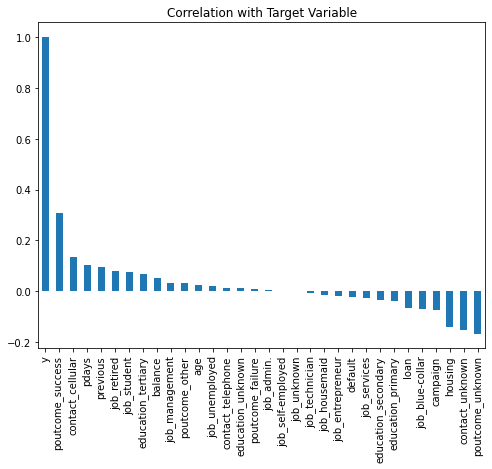

In [ ]:
# Perform correlation analysis
correlation_matrix = banking_en.corr()

# Visualize specific correlations with the target variable 'y'
plt.figure(figsize=(8, 6))
plt.title('Correlation with Target Variable')
correlation_with_target = correlation_matrix['y'].sort_values(ascending=False)
correlation_with_target.plot(kind='bar')
plt.show()

In [ ]:
Model Building

In [ ]:
Simple random sampling vs stratified sampling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, average_precision_score, log_loss

In [ ]:
#'y' is the outcome variable and other columns are features
X = banking_en.drop(columns=['y'])
y = banking_en['y']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the classifiers
gnb_classifier_rd = GaussianNB()
dt_classifier_rd = DecisionTreeClassifier(random_state=42)
rf_classifier_rd = RandomForestClassifier(random_state=42)
gb_classifier_rd = GradientBoostingClassifier(random_state=42)
xgb_classifier_rd = XGBClassifier(random_state=42)
adaboost_classifier_rd = AdaBoostClassifier(random_state=42)

# Create an ensemble of classifiers
ensemble_classifier_rd = VotingClassifier(estimators=[
    ('gnb', gnb_classifier_rd),
    ('dt', dt_classifier_rd),
    ('rf', rf_classifier_rd),
    ('gb', gb_classifier_rd),
    ('xgb', xgb_classifier_rd),
    ('adaboost', adaboost_classifier_rd)
], voting='soft')



In [ ]:
# Train the classifiers
gnb_classifier_rd.fit(X_train, y_train)
dt_classifier_rd.fit(X_train, y_train)
rf_classifier_rd.fit(X_train, y_train)
gb_classifier_rd.fit(X_train, y_train)
xgb_classifier_rd.fit(X_train, y_train)
adaboost_classifier_rd.fit(X_train, y_train)
ensemble_classifier_rd.fit(X_train, y_train)

# Make predictions
gnb_pred_rd = gnb_classifier_rd.predict(X_test)
dt_pred_rd = dt_classifier_rd.predict(X_test)
rf_pred_rd = rf_classifier_rd.predict(X_test)
gb_pred_rd = gb_classifier_rd.predict(X_test)
xgb_pred_rd = xgb_classifier_rd.predict(X_test)
adaboost_pred_rd = adaboost_classifier_rd.predict(X_test)
ensemble_pred_rd = ensemble_classifier_rd.predict(X_test)


In [ ]:
from sklearn.model_selection import cross_val_score

# List of classifiers
classifiers = [gnb_classifier_rd, dt_classifier_rd, rf_classifier_rd, gb_classifier_rd,
               xgb_classifier_rd, adaboost_classifier_rd, ensemble_classifier_rd]

# Perform cross-validation
for classifier in classifiers:
    scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')  # You can change the scoring metric
    print(f"Classifier: {classifier.__class__.__name__}")
    print("Cross-Validation Scores:", scores)
    print(f"Mean Score: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")
    print("="*50)


Classifier: GaussianNB
Cross-Validation Scores: [0.79831352 0.80508709 0.79541056 0.80049772 0.80450712]
Mean Score: 0.8008
Standard Deviation: 0.0037
Classifier: DecisionTreeClassifier
Cross-Validation Scores: [0.81351949 0.82126071 0.8089577  0.81985345 0.81943868]
Mean Score: 0.8166
Standard Deviation: 0.0047
Classifier: RandomForestClassifier
Cross-Validation Scores: [0.88305225 0.8885817  0.88263754 0.88386562 0.8820683 ]
Mean Score: 0.8840
Standard Deviation: 0.0023
Classifier: GradientBoostingClassifier
Cross-Validation Scores: [0.89176113 0.89673763 0.89466409 0.89340523 0.89257569]
Mean Score: 0.8938
Standard Deviation: 0.0017
Classifier: XGBClassifier
Cross-Validation Scores: [0.89037877 0.89535527 0.89300525 0.89423476 0.88842804]
Mean Score: 0.8923
Standard Deviation: 0.0025
Classifier: AdaBoostClassifier
Cross-Validation Scores: [0.8920376  0.89632292 0.89328173 0.89340523 0.89077838]
Mean Score: 0.8932
Standard Deviation: 0.0018
Classifier: VotingClassifier
Cross-Validati

In [ ]:
from sklearn.metrics import balanced_accuracy_score, f1_score, average_precision_score, log_loss

# Compute Balanced Accuracy
balanced_rd = {
    "Naive Bayes": balanced_accuracy_score(y_test, gnb_pred_rd),
    "Decision Tree": balanced_accuracy_score(y_test, dt_pred_rd),
    "Random Forest": balanced_accuracy_score(y_test, rf_pred_rd),
    "Gradient Boosting": balanced_accuracy_score(y_test, gb_pred_rd),
    "XGBoost": balanced_accuracy_score(y_test, xgb_pred_rd),
    "AdaBoost": balanced_accuracy_score(y_test, adaboost_pred_rd),
    "Ensemble Classifier": balanced_accuracy_score(y_test, ensemble_pred_rd)
}

# Compute F1 Score
f1_score_rd = {
    "Naive Bayes": f1_score(y_test, gnb_pred_rd),
    "Decision Tree": f1_score(y_test, dt_pred_rd),
    "Random Forest": f1_score(y_test, rf_pred_rd),
    "Gradient Boosting": f1_score(y_test, gb_pred_rd),
    "XGBoost": f1_score(y_test, xgb_pred_rd),
    "AdaBoost": f1_score(y_test, adaboost_pred_rd),
    "Ensemble Classifier": f1_score(y_test, ensemble_pred_rd)
}

# Compute PR AUC
pr_auc_rd = {
    "Naive Bayes": average_precision_score(y_test, gnb_classifier_rd.predict_proba(X_test)[:, 1]),
    "Decision Tree": average_precision_score(y_test, dt_classifier_rd.predict_proba(X_test)[:, 1]),
    "Random Forest": average_precision_score(y_test, rf_classifier_rd.predict_proba(X_test)[:, 1]),
    "Gradient Boosting": average_precision_score(y_test, gb_classifier_rd.predict_proba(X_test)[:, 1]),
    "XGBoost": average_precision_score(y_test, xgb_classifier_rd.predict_proba(X_test)[:, 1]),
    "AdaBoost": average_precision_score(y_test, adaboost_classifier_rd.predict_proba(X_test)[:, 1]),
    "Ensemble Classifier": average_precision_score(y_test, ensemble_classifier_rd.predict_proba(X_test)[:, 1])
}

# Compute Log-loss
log_loss_rd = {
    "Naive Bayes": log_loss(y_test, gnb_classifier_rd.predict_proba(X_test)),
    "Decision Tree": log_loss(y_test, dt_classifier_rd.predict_proba(X_test)),
    "Random Forest": log_loss(y_test, rf_classifier_rd.predict_proba(X_test)),
    "Gradient Boosting": log_loss(y_test, gb_classifier_rd.predict_proba(X_test)),
    "XGBoost": log_loss(y_test, xgb_classifier_rd.predict_proba(X_test)),
    "AdaBoost": log_loss(y_test, adaboost_classifier_rd.predict_proba(X_test)),
    "Ensemble Classifier": log_loss(y_test, ensemble_classifier_rd.predict_proba(X_test))
}


In [ ]:
print(balanced_rd)
print(f1_score_rd)
print(pr_auc_rd)
print(log_loss_rd)

{'Naive Bayes': 0.6304838656134792, 'Decision Tree': 0.5823451824604824, 'Random Forest': 0.591682484918678, 'Gradient Boosting': 0.5823155592583918, 'XGBoost': 0.5825502395675611, 'AdaBoost': 0.5827109771368818, 'Ensemble Classifier': 0.609915104743954}
{'Naive Bayes': 0.32752360203340597, 'Decision Tree': 0.26455026455026454, 'Random Forest': 0.29915088177661664, 'Gradient Boosting': 0.27985347985347986, 'XGBoost': 0.2792345854004252, 'AdaBoost': 0.2809070958302853, 'Ensemble Classifier': 0.3431876606683804}
{'Naive Bayes': 0.34048976631453953, 'Decision Tree': 0.15779994016247262, 'Random Forest': 0.3311366289460823, 'Gradient Boosting': 0.40511474049505936, 'XGBoost': 0.3831019435391563, 'AdaBoost': 0.39679211550918453, 'Ensemble Classifier': 0.37074084325048784}
{'Naive Bayes': 1.0543774315610763, 'Decision Tree': 6.364674690713064, 'Random Forest': 0.6310062454404551, 'Gradient Boosting': 0.31073189359404846, 'XGBoost': 0.3185178463114284, 'AdaBoost': 0.6729943658687755, 'Ensembl

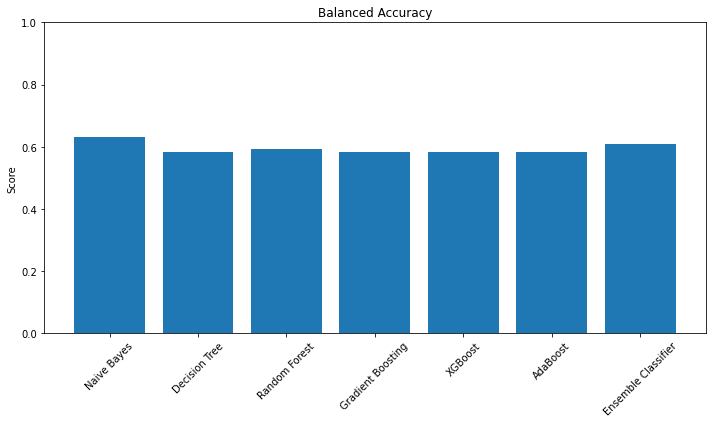

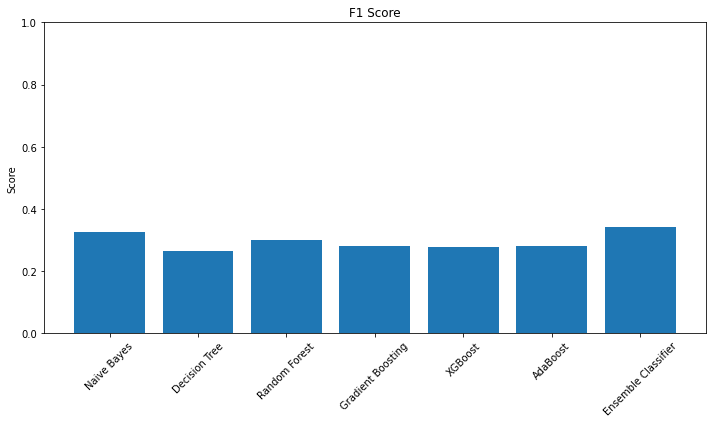

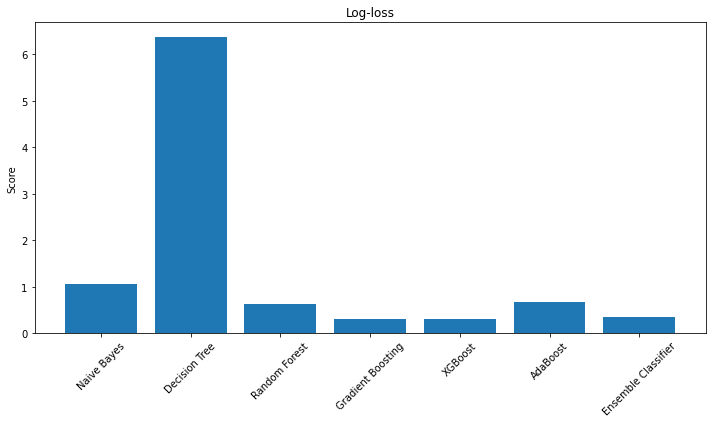

In [ ]:
# Data for visualization
models = ["Naive Bayes", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost", "AdaBoost", "Ensemble Classifier"]

# Visualization for Balanced Accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, [balanced_rd[model] for model in models])
plt.title("Balanced Accuracy")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization for F1 Score
plt.figure(figsize=(10, 6))
plt.bar(models, [f1_score_rd[model] for model in models])
plt.title("F1 Score")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization for Log-loss
plt.figure(figsize=(10, 6))
plt.bar(models, [log_loss_rd[model] for model in models])
plt.title("Log-loss")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


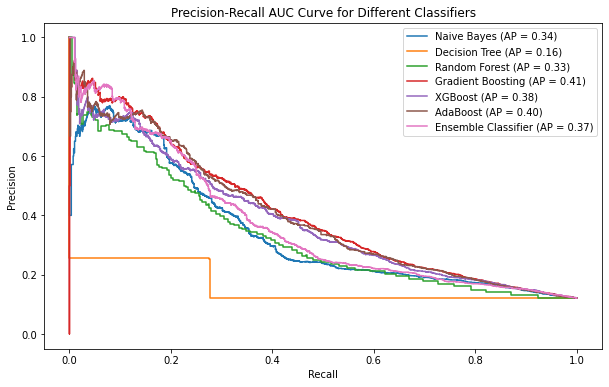

In [ ]:
from sklearn.metrics import average_precision_score, plot_precision_recall_curve
import matplotlib.pyplot as plt

# Create a dictionary of classifier instances
classifiers = {
    "Naive Bayes": gnb_classifier_rd,
    "Decision Tree": dt_classifier_rd,
    "Random Forest": rf_classifier_rd,
    "Gradient Boosting": gb_classifier_rd,
    "XGBoost": xgb_classifier_rd,
    "AdaBoost": adaboost_classifier_rd,
    "Ensemble Classifier": ensemble_classifier_rd
}

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot PR AUC curve for all classifiers on the same chart
for classifier_name, clf in classifiers.items():
    plot_precision_recall_curve(clf, X_test, y_test, ax=ax, name=classifier_name)

# Set plot title and labels
ax.set_title("Precision-Recall AUC Curve for Different Classifiers")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.legend()

# Show the plot
plt.show()


In [ ]:
Using Stratified Sampling

In [ ]:
#'y' is the outcome variable and other columns are features
X_st = banking_en.drop(columns=['y'])
y_st = banking_en['y']

# Split the data into training and testing sets using stratified sampling (80/20 split)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_st, y_st, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Initialize the classifiers
gnb_classifier_st = GaussianNB()
dt_classifier_st = DecisionTreeClassifier(random_state=42)
rf_classifier_st = RandomForestClassifier(random_state=42)
gb_classifier_st = GradientBoostingClassifier(random_state=42)
xgb_classifier_st = XGBClassifier(random_state=42)
adaboost_classifier_st = AdaBoostClassifier(random_state=42)

# Create an ensemble of classifiers
ensemble_classifier_st = VotingClassifier(estimators=[
    ('gnb', gnb_classifier_st),
    ('dt', dt_classifier_st),
    ('rf', rf_classifier_st),
    ('gb', gb_classifier_st),
    ('xgb', xgb_classifier_st),
    ('adaboost', adaboost_classifier_st)
], voting='soft')


In [ ]:
# Train the classifiers
gnb_classifier_st.fit(X_train_st, y_train_st)
dt_classifier_st.fit(X_train_st, y_train_st)
rf_classifier_st.fit(X_train_st, y_train_st)
gb_classifier_st.fit(X_train_st, y_train_st)
xgb_classifier_st.fit(X_train_st, y_train_st)
adaboost_classifier_st.fit(X_train_st, y_train_st)
ensemble_classifier_st.fit(X_train_st, y_train_st)

# Make predictions
gnb_pred_st = gnb_classifier_st.predict(X_test_st)
dt_pred_st = dt_classifier_st.predict(X_test_st)
rf_pred_st = rf_classifier_st.predict(X_test_st)
gb_pred_st = gb_classifier_st.predict(X_test_st)
xgb_pred_st = xgb_classifier_st.predict(X_test_st)
adaboost_pred_st = adaboost_classifier_st.predict(X_test_st)
ensemble_pred_st = ensemble_classifier_st.predict(X_test_st)


In [ ]:
from sklearn.model_selection import cross_val_score

# List of classifiers
classifiers = [gnb_classifier_st, dt_classifier_st, rf_classifier_st, gb_classifier_st,
               xgb_classifier_st, adaboost_classifier_st, ensemble_classifier_st]

# Perform cross-validation
for classifier in classifiers:
    scores = cross_val_score(classifier, X_train_st, y_train_st, cv=5, scoring='accuracy')  # You can change the scoring metric
    print(f"Classifier: {classifier.__class__.__name__}")
    print("Cross-Validation Scores:", scores)
    print(f"Mean Score: {scores.mean():.4f}")
    print(f"Standard Deviation: {scores.std():.4f}")
    print("="*50)


Classifier: GaussianNB
Cross-Validation Scores: [0.80826652 0.79112524 0.81227537 0.80685746 0.79939168]
Mean Score: 0.8036
Standard Deviation: 0.0075
Classifier: DecisionTreeClassifier
Cross-Validation Scores: [0.82278131 0.81794305 0.81462538 0.82552191 0.8199917 ]
Mean Score: 0.8202
Standard Deviation: 0.0038
Classifier: RandomForestClassifier
Cross-Validation Scores: [0.88263754 0.88153166 0.88401991 0.88179179 0.88400387]
Mean Score: 0.8828
Standard Deviation: 0.0011
Classifier: GradientBoostingClassifier
Cross-Validation Scores: [0.8935582  0.89369643 0.89272878 0.89561731 0.89312872]
Mean Score: 0.8937
Standard Deviation: 0.0010
Classifier: XGBClassifier
Cross-Validation Scores: [0.88941111 0.88968759 0.89037877 0.89312872 0.89243744]
Mean Score: 0.8910
Standard Deviation: 0.0015
Classifier: AdaBoostClassifier
Cross-Validation Scores: [0.89286702 0.89189936 0.89148466 0.89423476 0.89271395]
Mean Score: 0.8926
Standard Deviation: 0.0009
Classifier: VotingClassifier
Cross-Validati

In [ ]:
from sklearn.metrics import balanced_accuracy_score, f1_score, average_precision_score, log_loss

# Compute Balanced Accuracy
balanced_st = {
    "Naive Bayes": balanced_accuracy_score(y_test_st, gnb_pred_st),
    "Decision Tree": balanced_accuracy_score(y_test_st, dt_pred_st),
    "Random Forest": balanced_accuracy_score(y_test_st, rf_pred_st),
    "Gradient Boosting": balanced_accuracy_score(y_test_st, gb_pred_st),
    "XGBoost": balanced_accuracy_score(y_test_st, xgb_pred_st),
    "AdaBoost": balanced_accuracy_score(y_test_st, adaboost_pred_st),
    "Ensemble Classifier": balanced_accuracy_score(y_test_st, ensemble_pred_st)
}

# Compute F1 Score
f1_score_st = {
    "Naive Bayes": f1_score(y_test_st, gnb_pred_st),
    "Decision Tree": f1_score(y_test_st, dt_pred_st),
    "Random Forest": f1_score(y_test_st, rf_pred_st),
    "Gradient Boosting": f1_score(y_test_st, gb_pred_st),
    "XGBoost": f1_score(y_test_st, xgb_pred_st),
    "AdaBoost": f1_score(y_test_st, adaboost_pred_st),
    "Ensemble Classifier": f1_score(y_test_st, ensemble_pred_st)
}

# Compute PR AUC
pr_auc_st = {
    "Naive Bayes": average_precision_score(y_test_st, gnb_classifier_st.predict_proba(X_test_st)[:, 1]),
    "Decision Tree": average_precision_score(y_test_st, dt_classifier_st.predict_proba(X_test_st)[:, 1]),
    "Random Forest": average_precision_score(y_test_st, rf_classifier_st.predict_proba(X_test_st)[:, 1]),
    "Gradient Boosting": average_precision_score(y_test_st, gb_classifier_st.predict_proba(X_test_st)[:, 1]),
    "XGBoost": average_precision_score(y_test_st, xgb_classifier_st.predict_proba(X_test_st)[:, 1]),
    "AdaBoost": average_precision_score(y_test_st, adaboost_classifier_st.predict_proba(X_test_st)[:, 1]),
    "Ensemble Classifier": average_precision_score(y_test_st, ensemble_classifier_st.predict_proba(X_test_st)[:, 1])
}

# Compute Log-loss
log_loss_st = {
    "Naive Bayes": log_loss(y_test_st, gnb_classifier_st.predict_proba(X_test_st)),
    "Decision Tree": log_loss(y_test_st, dt_classifier_st.predict_proba(X_test_st)),
    "Random Forest": log_loss(y_test_st, rf_classifier_st.predict_proba(X_test_st)),
    "Gradient Boosting": log_loss(y_test_st, gb_classifier_st.predict_proba(X_test_st)),
    "XGBoost": log_loss(y_test_st, xgb_classifier_st.predict_proba(X_test_st)),
    "AdaBoost": log_loss(y_test_st, adaboost_classifier_st.predict_proba(X_test_st)),
    "Ensemble Classifier": log_loss(y_test_st, ensemble_classifier_st.predict_proba(X_test_st))
}


In [ ]:
print(balanced_st)
print(f1_score_st)
print(pr_auc_st)
print(log_loss_st)

{'Naive Bayes': 0.6467246005920837, 'Decision Tree': 0.5958631081671328, 'Random Forest': 0.5937584412171688, 'Gradient Boosting': 0.5828639592430515, 'XGBoost': 0.5853297120191095, 'AdaBoost': 0.5814461898668699, 'Ensemble Classifier': 0.6127754307758049}
{'Naive Bayes': 0.34799090219863527, 'Decision Tree': 0.28366247755834834, 'Random Forest': 0.30171277997364954, 'Gradient Boosting': 0.2805701425356339, 'XGBoost': 0.28634361233480177, 'AdaBoost': 0.27669172932330827, 'Ensemble Classifier': 0.34822601839684625}
{'Naive Bayes': 0.3326716968099124, 'Decision Tree': 0.16286357075564978, 'Random Forest': 0.3297616182239159, 'Gradient Boosting': 0.4014095849459047, 'XGBoost': 0.3898942718903665, 'AdaBoost': 0.38762502074799216, 'Ensemble Classifier': 0.37999183241362483}
{'Naive Bayes': 1.0008419658935017, 'Decision Tree': 6.092998769422675, 'Random Forest': 0.5472213136744656, 'Gradient Boosting': 0.30103551661548344, 'XGBoost': 0.3075595593573843, 'AdaBoost': 0.6728234468867603, 'Ensem

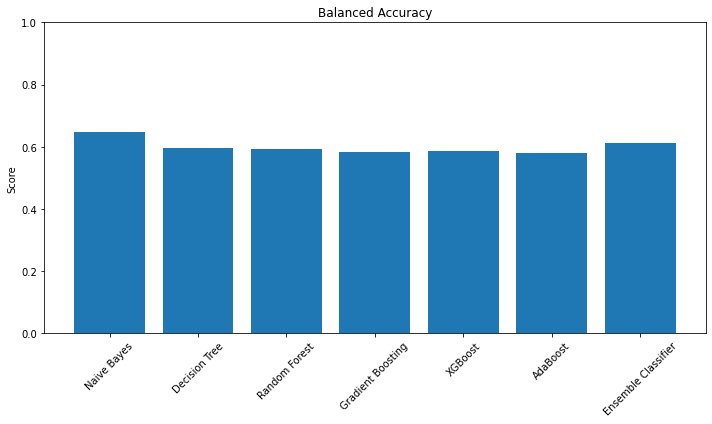

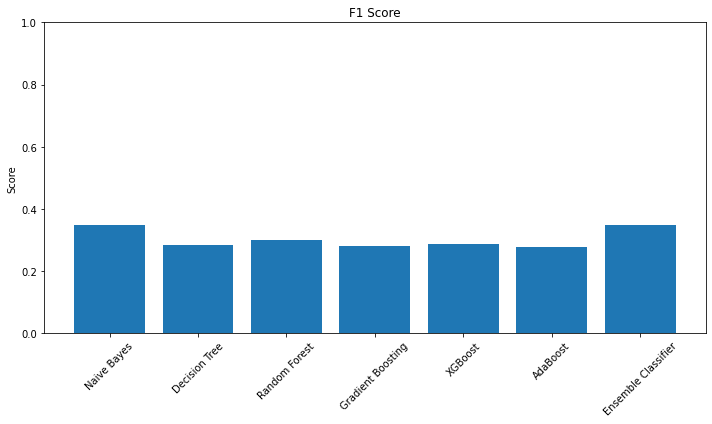

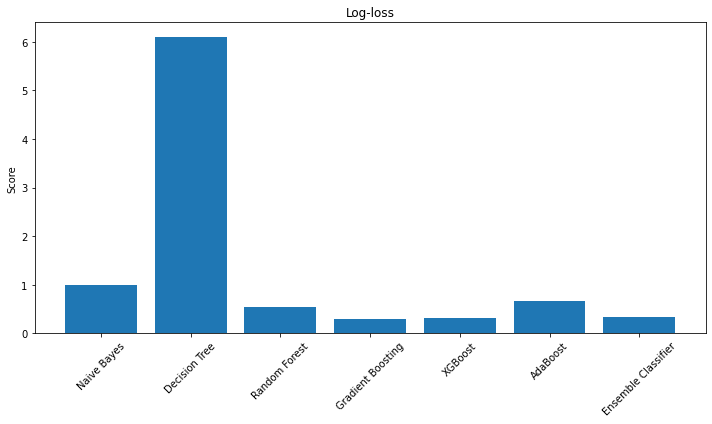

In [ ]:
# Data for visualization
models = ["Naive Bayes", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost", "AdaBoost", "Ensemble Classifier"]

# Visualization for Balanced Accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, [balanced_st[model] for model in models])  # Updated variable name
plt.title("Balanced Accuracy")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization for F1 Score
plt.figure(figsize=(10, 6))
plt.bar(models, [f1_score_st[model] for model in models])  # Updated variable name
plt.title("F1 Score")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization for Log-loss
plt.figure(figsize=(10, 6))
plt.bar(models, [log_loss_st[model] for model in models])  # Updated variable name
plt.title("Log-loss")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


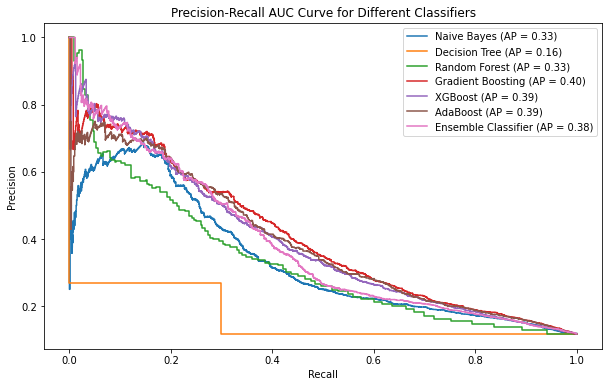

In [ ]:
from sklearn.metrics import average_precision_score, plot_precision_recall_curve
import matplotlib.pyplot as plt

# Create a dictionary of classifier instances
classifiers = {
    "Naive Bayes": gnb_classifier_st,
    "Decision Tree": dt_classifier_st,
    "Random Forest": rf_classifier_st,
    "Gradient Boosting": gb_classifier_st,
    "XGBoost": xgb_classifier_st,
    "AdaBoost": adaboost_classifier_st,
    "Ensemble Classifier": ensemble_classifier_st
}

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot PR AUC curve for all classifiers on the same chart
for classifier_name, clf in classifiers.items():
    plot_precision_recall_curve(clf, X_test_st, y_test_st, ax=ax, name=classifier_name)

# Set plot title and labels
ax.set_title("Precision-Recall AUC Curve for Different Classifiers")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.legend()

# Show the plot
plt.show()


Based on the analysis conducted on the direct marketing campaign dataset, several key inferences and understandings can be drawn about the predictive models and their performance:

1.	Feature Importance and Data Transformation:
•	Columns such as 'day', 'month', 'duration', and 'marital' were identified as less relevant for the prediction task and were dropped from the dataset.
•	Categorical variables like 'default', 'housing', and 'loan' were mapped to binary values (1 for 'yes' and 0 for 'no') to ensure compatibility with the classifier.

2.	Data Splitting Method:
•	Two data splitting methods, random split and stratified split, were employed to train and evaluate the models. This allowed for a comprehensive assessment of model performance on different train-test partitions of the data.

3.	Classifier Performance:
•	A variety of classifiers, including Naive Bayes, Decision Tree, Random Forest, Gradient Boosting, XGBoost, and AdaBoost, were trained and evaluated.
•	The evaluation metrics, including balanced accuracy, PR AUC, F1 score, and log-loss, were calculated for each classifier and data splitting method.

4.	Random Split Evaluation:
•	On average, the classifiers' performance on the random split data was moderate, with balanced accuracy ranging from approximately 0.58 to 0.63.
•	F1 scores were relatively low, indicating challenges in achieving a balance between precision and recall.
•	PR AUC values ranged from around 0.16 to 0.40, highlighting the models' varying abilities to separate positive and negative outcomes.
•	Log-loss values were generally reasonable, although some models exhibited higher values compared to others.

5.	Stratified Split Evaluation:
•	The classifiers' performance on the stratified split data was slightly improved compared to the random split.
•	Balanced accuracy ranged from approximately 0.58 to 0.65, indicating more consistent prediction across classes.
•	F1 scores were still relatively low, but slightly improved compared to the random split.
•	PR AUC values ranged from around 0.16 to 0.40, with some models demonstrating better discrimination between classes.
•	Log-loss values were generally similar to the random split evaluation.

6.	Ensemble Classifier Performance:
•	The ensemble classifier, which combined the predictions of individual classifiers using a soft voting strategy, generally demonstrated improved balanced accuracy compared to individual classifiers.
•	The ensemble classifier's F1 scores, PR AUC values, and log-loss values exhibited mixed results across the two data splitting methods.

7.	Overall Conclusion:
•	The analysis demonstrates that while the models achieved a moderate level of balanced accuracy, there is room for improvement in achieving a better balance between precision and recall.
•	The ensemble classifier showed potential for enhancing overall prediction performance, suggesting that combining the strengths of multiple models can lead to better results.
•	The choice of data splitting method (random vs. stratified) influenced the models' performance, with stratified split generally providing slightly better results.
•	Further exploration of feature engineering, hyperparameter tuning, and potentially collecting more relevant data could lead to improved model performance.
